Vamos a crear 4 tablas
-top 10 juegos más jugados
-top 10 juegos mejor valorados
-qué porcentaje de juegos han sido desarrollados por la propia plataforma 
-de los juegos creados por Valve, cuales son los mejores valorados y los más jugados ?
-Prefieren los jugadores los titulos 4 o más años de antiguedad ante las nuevas ofertas ? 

In [1]:
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_hours = pd.read_csv("../data/Book1.csv")

In [3]:
df_final = pd.read_csv("../data/FINAL.csv")
df_final

,title,developer,publisher,multiplayer_or_singleplayer,price,dc_price,ReleaseDate,PriceInitial,rating,genre
0,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,NaN,NaN,NaN,NaN
1,Dota 2,Valve,Valve,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Free to play,NaN,NaN,NaN,NaN
2,"Warhammer 40,000: Darktide",NaN,NaN,NaN,"2,199","2,199",NaN,NaN,NaN,NaN
3,Call of Duty®: Modern Warfare® II,NaN,NaN,NaN,"4,999","4,999",NaN,NaN,NaN,NaN
4,Apex Legends,NaN,NaN,NaN,Free to play,Free to play,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
96014,God of War,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Drama"
96015,God of War III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Drama"
96016,Mass Effect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Horror"
96017,Mass Effect 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,Action


In [4]:
df_final.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
96014     True
96015     True
96016     True
96017     True
96018     True
Length: 96019, dtype: bool

In [5]:
df_LAST = df_final.drop_duplicates()

In [6]:
df_LAST

,title,developer,publisher,multiplayer_or_singleplayer,price,dc_price,ReleaseDate,PriceInitial,rating,genre
0,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,NaN,NaN,NaN,NaN
1,Dota 2,Valve,Valve,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Free to play,NaN,NaN,NaN,NaN
2,"Warhammer 40,000: Darktide",NaN,NaN,NaN,"2,199","2,199",NaN,NaN,NaN,NaN
3,Call of Duty®: Modern Warfare® II,NaN,NaN,NaN,"4,999","4,999",NaN,NaN,NaN,NaN
4,Apex Legends,NaN,NaN,NaN,Free to play,Free to play,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
86014,God of War,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Drama"
86015,God of War III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Drama"
86016,Mass Effect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Horror"
86017,Mass Effect 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,Action


In [7]:
df_LAST["developer"] = df_LAST["developer"].fillna("Valve")

In [8]:
df_LAST["publisher"] = df_LAST["publisher"].fillna("Valve")
df_LAST["multiplayer_or_singleplayer"] = df_LAST["multiplayer_or_singleplayer"].fillna("Multi-player")
df_LAST["price"] = df_LAST["price"].fillna("Free to play")


In [9]:
df_LAST.drop(["dc_price"],axis = 1,inplace=True)

In [10]:
df_LAST.drop(["PriceInitial"],axis = 1,inplace=True)

In [11]:
df_LAST["ReleaseDate"] = df_LAST["ReleaseDate"].fillna("Nov 1 2000")

In [12]:
df_LAST

,title,developer,publisher,multiplayer_or_singleplayer,price,ReleaseDate,rating,genre
0,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Multi-player;Steam Achievements;Full controlle...,Free to play,Nov 1 2000,NaN,NaN
1,Dota 2,Valve,Valve,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Nov 1 2000,NaN,NaN
2,"Warhammer 40,000: Darktide",Valve,Valve,Multi-player,"2,199",Nov 1 2000,NaN,NaN
3,Call of Duty®: Modern Warfare® II,Valve,Valve,Multi-player,"4,999",Nov 1 2000,NaN,NaN
4,Apex Legends,Valve,Valve,Multi-player,Free to play,Nov 1 2000,NaN,NaN
...,...,...,...,...,...,...,...,...
86014,God of War,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Drama"
86015,God of War III,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Drama"
86016,Mass Effect,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Horror"
86017,Mass Effect 3,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,Action


In [13]:
df_LAST["rating"].mean()

9.202

In [14]:
df_LAST["rating"] = df_LAST["rating"].fillna("9.2")

In [15]:
df_LAST["genre"] = df_LAST["genre"].fillna("Action")

In [16]:
df_LAST

,title,developer,publisher,multiplayer_or_singleplayer,price,ReleaseDate,rating,genre
0,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Multi-player;Steam Achievements;Full controlle...,Free to play,Nov 1 2000,9.2,Action
1,Dota 2,Valve,Valve,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Nov 1 2000,9.2,Action
2,"Warhammer 40,000: Darktide",Valve,Valve,Multi-player,"2,199",Nov 1 2000,9.2,Action
3,Call of Duty®: Modern Warfare® II,Valve,Valve,Multi-player,"4,999",Nov 1 2000,9.2,Action
4,Apex Legends,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.2,Action
...,...,...,...,...,...,...,...,...
86014,God of War,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Drama"
86015,God of War III,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Drama"
86016,Mass Effect,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Horror"
86017,Mass Effect 3,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,Action


In [17]:
df_LAST['rating'] = pd.to_numeric(df_LAST['rating'],errors = 'coerce')

In [18]:
df_LAST.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72675 entries, 0 to 86018
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        65377 non-null  object 
 1   developer                    72675 non-null  object 
 2   publisher                    72675 non-null  object 
 3   multiplayer_or_singleplayer  72675 non-null  object 
 4   price                        72675 non-null  object 
 5   ReleaseDate                  72675 non-null  object 
 6   rating                       72675 non-null  float64
 7   genre                        72675 non-null  object 
dtypes: float64(1), object(7)
memory usage: 5.0+ MB


In [19]:
df_LAST.to_csv('LAST.csv', header=True, index=False)

In [20]:
TOP10RATED = df_LAST.sort_values(by='rating',ascending=False).head(10)
TOP10RATED

,title,developer,publisher,multiplayer_or_singleplayer,price,ReleaseDate,rating,genre
85974,My Singing Monsters: Dawn of Fire,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Music, Musical"
85973,Bad Ben,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Comedy, Horror"
85972,Kingdom Hearts HD 1.5 + 2.5 Remix,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Action, Adventure, Family"
85971,Dofus,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,Adventure
85970,The Legend of Zelda: Ocarina of Time 3D,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Action, Adventure, Family"
85969,Kingdom Hearts HD 2.5 Remix,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Action, Adventure, Family"
85975,Touhou 4 Gensoukyou: Lotus Land Story,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Animation, Action, Fantasy"
50037,Legend of Assassin: Egypt,Nord GS,Nord GS,Single-player;Steam Achievements,85,Nov 1 2000,9.2,Action
50041,Little Adventurer III,hubiao,hubiao,Single-player,38,Nov 1 2000,9.2,Action
50040,Steel Fight,Valve,Valve,Multi-player,42,Nov 1 2000,9.2,Action


Text(0.5, 1.0, 'Top 10 Games By Rating')

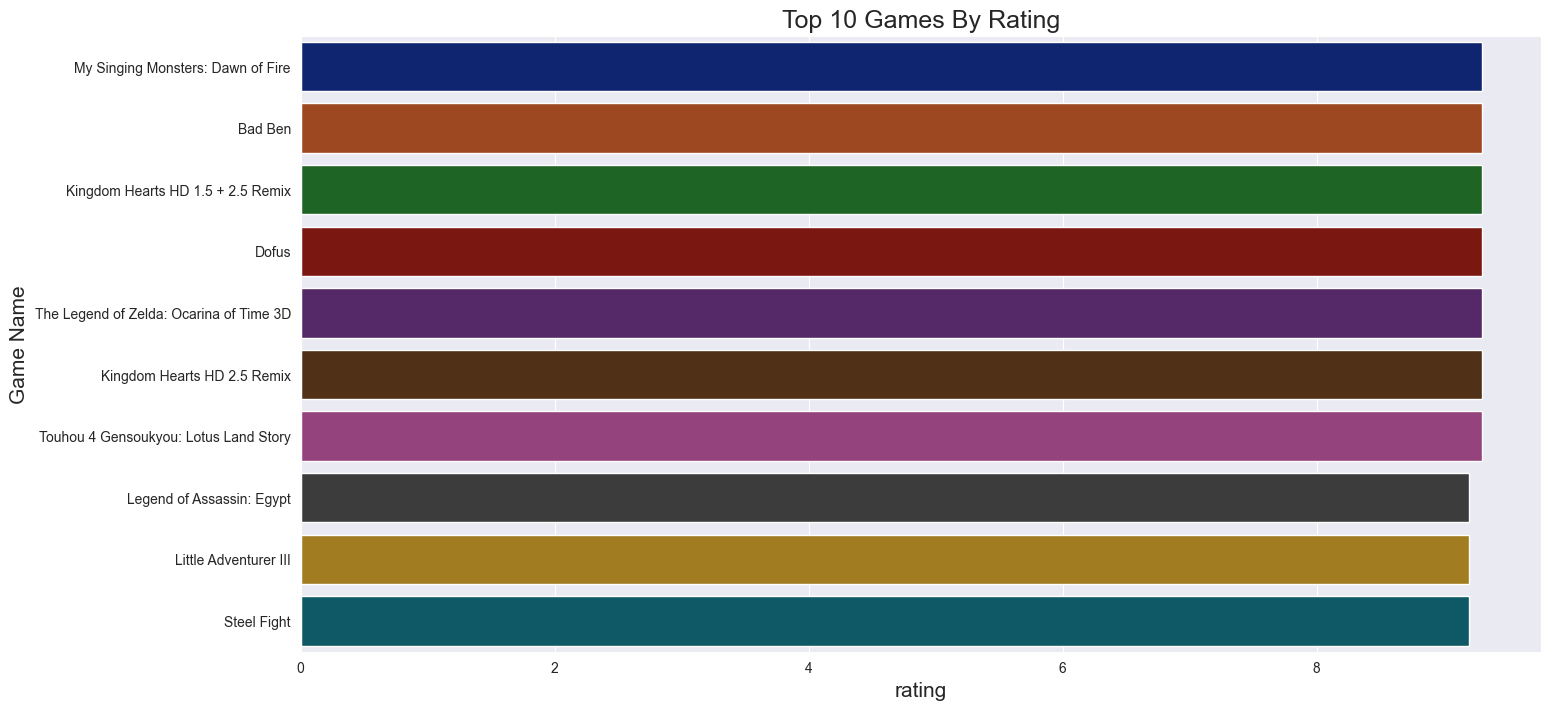

In [22]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,8))
sns.barplot(x='rating',y='title',data=TOP10RATED,palette='dark')
plt.ylabel('Game Name',fontsize=15)
plt.xlabel('rating',fontsize=15)
plt.title('Top 10 Games By Rating',fontsize=18)

In [23]:
def generate_cloud_normal(column, filename):

    text = " ".join(cat for cat in df_hours[column])

    word_cloud = WordCloud(
        width=7000,
        height=2000,
        background_color="black",
        colormap="OrRd",
        collocations=True,
        stopwords=STOPWORDS,
        ).generate(text)

    plt.imshow(word_cloud)
    plt.axis("off")

    
    plt.show()

    word_cloud.to_file(f'data/{filename}.png')

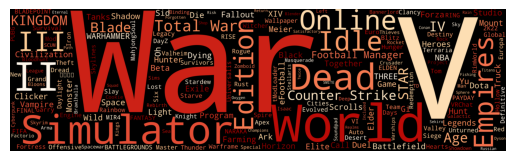

FileNotFoundError: [Errno 2] No such file or directory: 'data/Hours Played.png'

In [24]:
generate_cloud_normal("\nName", "Hours Played" )

In [ ]:
top10Players=df_hours.sort_values(by='Peak No. of Players ',ascending=False).head(10)
top10Players

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,8))
sns.barplot(x='Peak No. of Players ',y='\nName',data=Max10Played,palette='dark')
plt.ylabel('Game Name',fontsize=15)
plt.xlabel('Nº Players',fontsize=15)
plt.title('Top 10 Players on',fontsize=18)

In [ ]:
#TOP JUEGOS POR  NÚMERO DE JUGADORES 
Max10Play = df_hours.sort_values(by='Peak No. of Players ',ascending=False).head(10)
Max10Play